In [8]:
%load_ext autoreload
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.vq import whiten
%aimport utils
%aimport neuralnetwork
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train = np.loadtxt('digitstrain.txt', delimiter=',')
np.random.shuffle(train)
train_imgs = train[:, 0:-1]
train_labels = train[:, -1]
valid = np.loadtxt('digitsvalid.txt', delimiter=',')
valid_imgs = valid[:, 0:-1]
valid_labels = valid[:, -1]

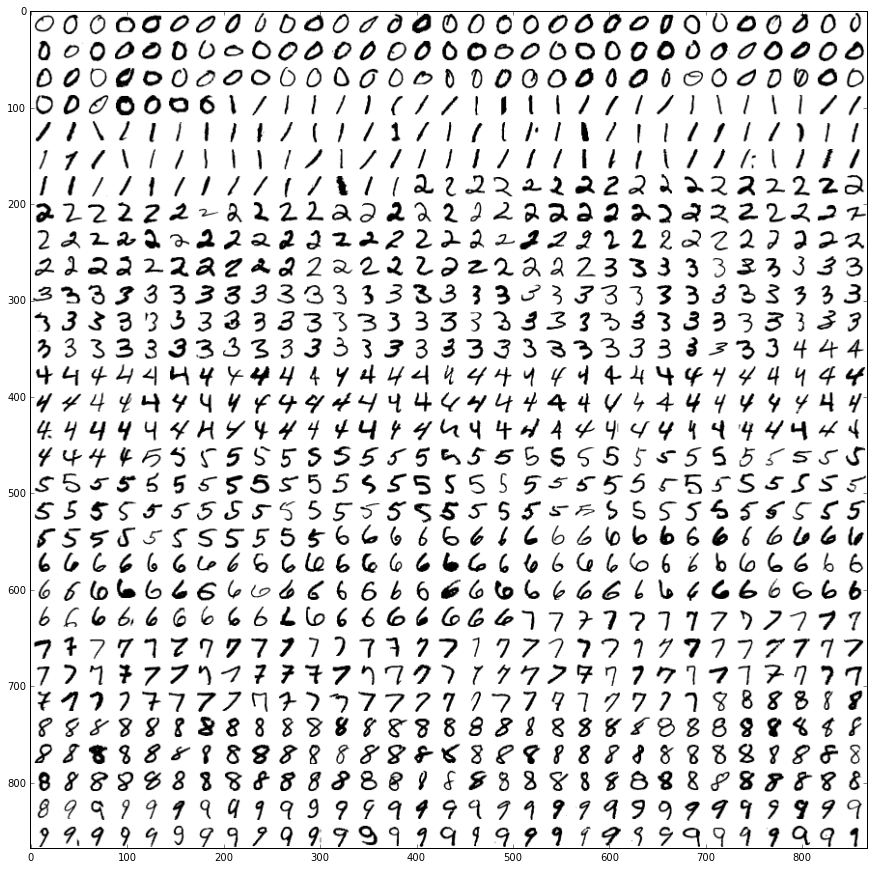

In [3]:
new_img = utils.image_grid(valid_imgs)
f = plt.figure(figsize=(15,15))
plt.imshow(new_img, cmap=plt.cm.binary)

In [4]:
## Whitening
train_imgs = train[:, 0:-1]
train_labels = train[:, -1]
valid = np.loadtxt('digitsvalid.txt', delimiter=',')
valid_imgs = valid[:, 0:-1]
valid_labels = valid[:, -1]

train_imgs = train_imgs - np.mean(train_imgs, axis=0)
train_imgs = whiten(train_imgs)
valid_imgs = valid_imgs - np.mean(valid_imgs, axis=0)
valid_imgs = whiten(valid_imgs)

/Users/mbarnes1/anaconda/lib/python2.7/site-packages/scipy/cluster/vq.py:148: RuntimeWarning: Some columns have standard deviation zero. The values of these columns will not change.
  RuntimeWarning)


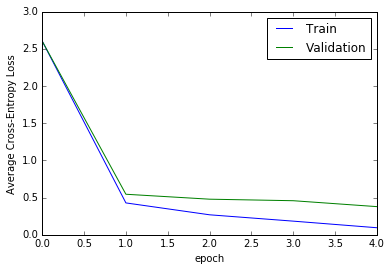

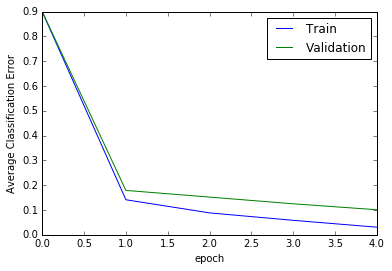

In [9]:
epochs = 20
eta = -0.1
H = [784, 100, 10]
for i in range(0, 1):
    net = neuralnetwork.SingleLayerNet(H)
    train_loss, valid_loss, train_error, valid_error, W = net.train(train_imgs, train_labels, valid_imgs, valid_labels, epochs, eta)
    plt.figure(i)
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.xlabel('epoch')
    plt.ylabel('Average Cross-Entropy Loss')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    plt.figure(i+5)
    plt.plot(train_error)
    plt.plot(valid_error)
    plt.xlabel('epoch')
    plt.ylabel('Average Classification Error')
    plt.legend(['Train', 'Validation'])
    plt.show()

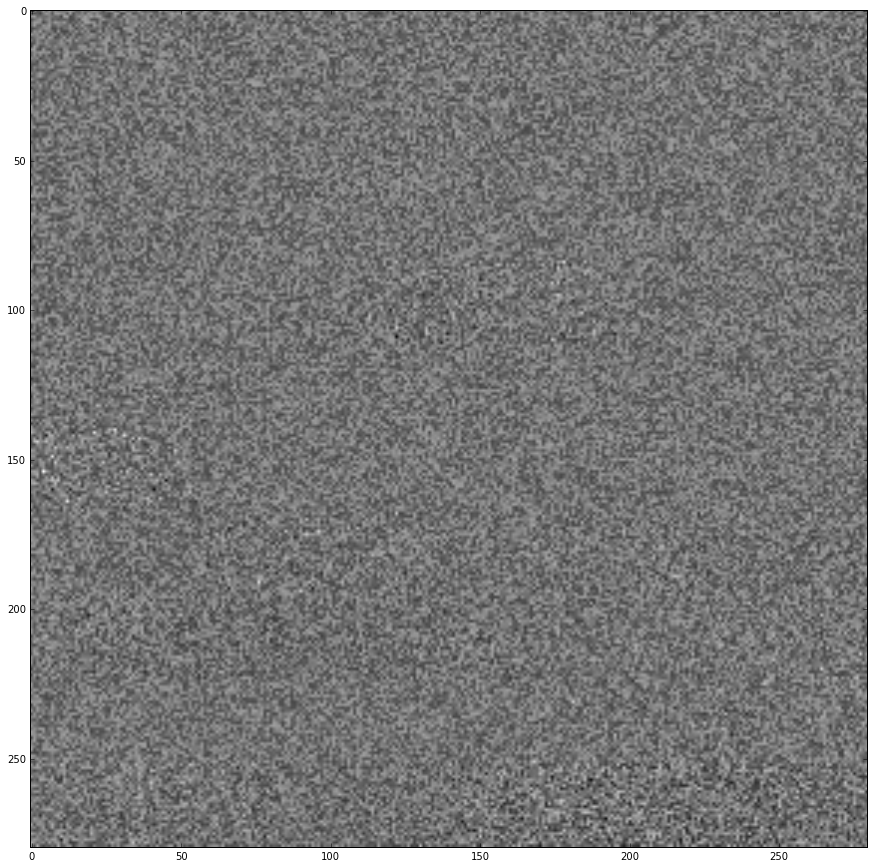

In [10]:
new_img = utils.image_grid(W[0:100])
f = plt.figure(figsize=(15,15))
plt.imshow(new_img, cmap=plt.cm.binary)

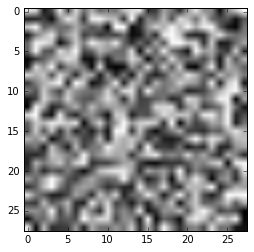

In [13]:
plt.imshow(W[0].reshape((28, 28)), cmap=plt.cm.binary)